# Optimizing a simple function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

c:\Users\DELL\miniconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note that `f = external_function(x, y)` is not the value of the function at that $(x,y)$, but returns the auto-differntiable pyTorch *function* `f`, so we can readily compute `f.backward()`.

In [ ]:
#CHATGPT 6 Dec. To learn pytorch syntax

# Define the external function
def external_function(x, y):
    return torch.relu(torch.cos(x**2 + (y-1)**2))
    # return torch.sin(torch.square(x) + torch.square(y))

# Define variables
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([x, y], lr=0.01)

# Optimization loop
for i in range(1000):
    optimizer.zero_grad()  # Clear gradients
    
    # Call the external function
    f = external_function(x, y)
    
    # Compute gradients
    f.backward()
    
    # Update variables
    optimizer.step()
    
    if i % 100 == 0:
        print(f"Iteration {i}: f(x, y) = {f.item()}, x = {x.item()}, y = {y.item()}")

print(f"Optimized values: x = {x.item()}, y = {y.item()}, f(x, y) = {f.item()}")

Iteration 0: f(x, y) = 0.5403023362159729, x = 1.0168293714523315, y = 1.0
Iteration 100: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 200: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 300: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 400: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 500: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 600: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 700: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 800: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Iteration 900: f(x, y) = 0.0, x = 1.2723854780197144, y = 1.0
Optimized values: x = 1.2723854780197144, y = 1.0, f(x, y) = 0.0


tensor(0.8336, grad_fn=<DivBackward0>)


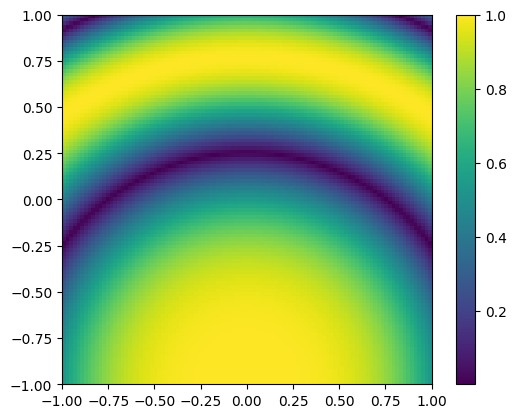

In [8]:
# x,y
import numpy as np
print((x**2 + y**2)/np.pi)

vals_x = np.linspace(-1,1,101)
vals_y = np.linspace(-1,1,101)
X,Y = np.meshgrid(vals_x,vals_y)
Z = abs(np.cos(X**2 + (Y-1)**2))
plt.imshow(Z,extent=[-1,1,-1,1])#vmin=-1,vmax=1,)#,vmax)
plt.colorbar()

# Optimizing multdimenstional tensors is easy, too

In [ ]:
import torch
import torch.optim as optim

# Create a 2D tensor (matrix)
tensor = torch.randn(2, 4, requires_grad=True)

# Create an optimizer (e.g., Adam)
optimizer = optim.Adam([tensor], lr=0.01)

# Perform optimization steps
for i in range(1000):
    # Compute loss (replace with your actual loss calculation)
    loss = torch.sum(torch.abs(tensor))

    # Update the tensor
    optimizer.zero_grad()  # Clear gradients
    loss.backward()       # Calculate gradients
    optimizer.step()       # Update tensor parameters
    if(i%25==10):
        print(f'Iteration {i} : (L1,C1) = {tensor}; f = {f.item()}')